# LF Log Data Analysis

This notebook analyzes the LF operation log data. The goals are:
1. Read data from `LF-Log.csv`.
2. Handle missing data.
3. Normalize date and time columns.
4. Fix the 'ngay' column (convert 1-31 to full dates in December).
5. Perform EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

## 1. Load Data

In [2]:
file_path = 'LF-Log.csv'
df = pd.read_csv(file_path)

# Display first few rows and info
display(df.head())
display(df.info())

,ngay,Ca,me_tinh_luyen_so,mac_thep_yeu_cau,thoi_gian_vao_tinh_luyen,bat_dau,ket_thuc,thoi_gian_len_duc,thung_lf,lan_luyen_thu,nhiet_do_vao_tl,C,Si,Mn,S,P,khoi_luong_thung_thep,FeSi,FeMn,SiMn,than,FeCr,FeV,Niken,FeP,Cu,khac,huynh_thach,nhom_thoi,voi_song,dolomite,quaczit,day_feca,day_casi,day_ca_dac,xi_bao_on,thoi_gian_danh_dien,tieu_thu,C.1,Si.1,Mn.1,S.1,P.1,Al,Ca.1,lan_1,ra_thep,nhiet_do_duc_yeu_cau,nhiet_do_do_tren_duc,thoi_gian_dinh_tre,ly_do_dinh_tre,ghi_chu_1,thoi_gian_bat_dau_thoi_mem,thoi_gian_ket_thu_thoi_mem,tong_thoi_gian_thoi_mem,tinh_trang_xi_lo_thoi_qua_tinh_luyen,tinh_trang_xi,ghi_chu
0,01/12/2025,1A,D7695,SAE1006-Al,07:43:00,07:48:00,08:15:00,08:27:00,6.0,1.0,1540.0,0.03,0.008,0.11,0.010,0.01,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,110.0,800.0,NaN,NaN,NaN,NaN,380.0,NaN,NaN,NaN,0.03,0.017,0.15,0.004,0.01,269.0,33.0,1587.0,1578.0,NaN,NaN,95,"NỐI THAN,CHỜ THÉP",NaN,08:18:00,08:25:00,00:07:00,ĐEN,BÌNH THƯỜNG,NaN
1,NaN,1A,C7518,SAE1006-Al,08:10:00,08:20:00,NaN,NaN,43.0,1.0,1586.0,0.02,0.010,0.11,0.009,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mẻ vượt Si chuyển mác,NaN,NaN,NaN,00:00:00,ĐEN,BÌNH THƯỜNG,NaN
2,NaN,1A,A7129,SAE1006-Al,09:00:00,09:07:00,09:26:00,09:36:00,14.0,1.0,1556.0,0.03,0.005,0.07,0.008,0.012,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,100.0,750.0,NaN,NaN,NaN,NaN,380.0,NaN,NaN,NaN,0.04,0.017,0.15,0.004,0.014,313.0,32.0,1586.0,1580.0,NaN,NaN,NaN,NaN,NaN,09:28:00,09:35:00,00:07:00,ĐEN,BÌNH THƯỜNG,NaN
3,NaN,1A,A7130,SAE1006-Al,09:38:00,09:41:00,09:58:00,10:08:00,20.0,1.0,1556.0,0.02,0.009,0.10,0.008,0.015,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,120.0,800.0,NaN,NaN,NaN,NaN,400.0,NaN,NaN,NaN,0.03,0.018,0.16,0.003,0.016,291.0,37.0,1588.0,1579.0,NaN,NaN,NaN,NaN,NaN,10:00:00,10:07:00,00:07:00,ĐEN,BÌNH THƯỜNG,NaN
4,NaN,1A,A7132,SAE1006-Al,11:48:00,11:53:00,13:16:00,13:30:00,6.0,1.0,1619.0,0.03,0.005,0.08,0.018,0.006,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,140.0,800.0,NaN,NaN,NaN,NaN,420.0,NaN,NaN,NaN,0.04,0.014,0.16,0.003,0.007,275.0,41.0,1600.0,1610.0,NaN,NaN,NaN,NaN,NaN,13:20:00,13:28:00,00:08:00,ĐEN,BÌNH THƯỜNG,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ngay                                  1701 non-null   object 
 1   Ca                                    1715 non-null   object 
 2   me_tinh_luyen_so                      1728 non-null   object 
 3   mac_thep_yeu_cau                      1728 non-null   object 
 4   thoi_gian_vao_tinh_luyen              1728 non-null   object 
 5   bat_dau                               1727 non-null   object 
 6   ket_thuc                              1716 non-null   object 
 7   thoi_gian_len_duc                     1709 non-null   object 
 8   thung_lf                              1728 non-null   object 
 9   lan_luyen_thu                         1728 non-null   float64
 10  nhiet_do_vao_tl                       1728 non-null   float64
 11  C                

None

## 2. Data Cleaning & Preprocessing

### 2.1 Fix 'ngay' (Date) column
The 'ngay' column contains mixed formats: full dates (e.g., '01/12/2025'), integers (1-31), or NaN. We need to standardize this to a Datetime object representing December 2025.

In [3]:
def clean_date(val):
    if pd.isna(val) or val == '':
        return np.nan
    
    str_val = str(val).strip()
    
    # Check if it looks like a full date (contains '/')
    if '/' in str_val:
        return pd.to_datetime(str_val, dayfirst=True)
    
    # Assume it's a day number if it's digit-like
    try:
        day = int(float(str_val))
        # Construct date for Dec 2025
        return pd.Timestamp(year=2025, month=12, day=day)
    except ValueError:
        return np.nan

# Apply cleaning
df['ngay_clean'] = df['ngay'].apply(clean_date)

# Forward fill missing dates (assuming blank means same as previous)
df['ngay_clean'] = df['ngay_clean'].ffill()

# Check stats
print("Unique dates found:")
print(df['ngay_clean'].unique())

# Update the main column or drop the old one if verified
# df['ngay'] = df['ngay_clean']

Unique dates found:
<DatetimeArray>
['2025-12-01 00:00:00', '2025-12-02 00:00:00', '2025-12-03 00:00:00',
 '2025-12-04 00:00:00', '2025-12-05 00:00:00', '2025-12-06 00:00:00',
 '2025-12-07 00:00:00', '2025-12-08 00:00:00', '2025-12-09 00:00:00',
 '2025-12-10 00:00:00', '2025-12-11 00:00:00', '2025-12-12 00:00:00',
 '2025-12-13 00:00:00', '2025-12-14 00:00:00', '2025-12-15 00:00:00',
 '2025-12-16 00:00:00', '2025-12-17 00:00:00', '2025-12-18 00:00:00',
 '2025-12-19 00:00:00', '2025-12-20 00:00:00', '2025-12-21 00:00:00',
 '2025-12-22 00:00:00', '2025-12-23 00:00:00', '2025-12-24 00:00:00',
 '2025-12-25 00:00:00', '2025-12-26 00:00:00', '2025-12-28 00:00:00',
 '2025-12-27 00:00:00', '2025-12-29 00:00:00', '2025-12-30 00:00:00',
 '2025-12-31 00:00:00']
Length: 31, dtype: datetime64[ns]


### 2.2 Handle Missing Data
Evaluate missing values.

In [4]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

ngay                                      27
Ca                                        13
bat_dau                                    1
ket_thuc                                  12
thoi_gian_len_duc                         19
C                                          5
Si                                         5
Mn                                         5
S                                          5
P                                          5
khoi_luong_thung_thep                   1728
FeSi                                    1724
FeMn                                       9
SiMn                                    1725
than                                    1599
FeCr                                    1728
FeV                                     1728
Niken                                   1728
FeP                                     1728
Cu                                      1728
khac                                    1027
huynh_thach                             1713
nhom_thoi 

In [5]:
# Strategy for filling missing values:
# - Additive columns (FeSi, FeMn, than, etc.) likely mean 0 additions if empty.
# - Logistical info (Time, Temperature) might be better left as NaN or interpolated depending on context.

# List of columns that are likely additives/measurements where NaN = 0
additive_cols = [
    'FeSi', 'FeMn', 'SiMn', 'than', 'FeCr', 'FeV', 'Niken', 'FeP', 'Cu', 'khac', 
    'huynh_thach', 'nhom_thoi', 'voi_song', 'dolomite', 'quaczit', 
    'day_feca', 'day_casi', 'day_ca_dac', 'xi_bao_on'
]

# Fill these with 0
for col in additive_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

print("Missing values after filling additives:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values after filling additives:
ngay                                      27
Ca                                        13
bat_dau                                    1
ket_thuc                                  12
thoi_gian_len_duc                         19
C                                          5
Si                                         5
Mn                                         5
S                                          5
P                                          5
khoi_luong_thung_thep                   1728
thoi_gian_danh_dien                      807
tieu_thu                                 806
C.1                                       42
Si.1                                      42
Mn.1                                      44
S.1                                       44
P.1                                       44
Al                                        45
Ca.1                                      45
lan_1                                     31
ra_thep        

### 2.3 Normalize Time Columns
Convert time strings to datetime objects, combining with the cleaning Date.

In [6]:
time_cols = [
    'thoi_gian_vao_tinh_luyen', 'bat_dau', 'ket_thuc', 'thoi_gian_len_duc',
    'thoi_gian_bat_dau_thoi_mem', 'thoi_gian_ket_thu_thoi_mem'
]

def combine_date_time(row, time_col_name, date_col_name='ngay_clean'):
    time_val = row[time_col_name]
    date_val = row[date_col_name]
    
    if pd.isna(time_val) or pd.isna(date_val):
        return pd.NaT
    
    try:
        # Parse time string possibly in various formats or just HH:MM:SS
        str_time = str(time_val).strip()
        # Handle cases like "08:00" or "08:00:00"
        
        # Create a dummy timestamp to extract time
        parsed_time = pd.to_datetime(str_time, format='%H:%M:%S', errors='coerce')
        if pd.isna(parsed_time):
             parsed_time = pd.to_datetime(str_time, format='%H:%M', errors='coerce')
        
        if pd.isna(parsed_time):
            return pd.NaT
            
        h, m, s = parsed_time.hour, parsed_time.minute, parsed_time.second
        
        full_dt = date_val.replace(hour=h, minute=m, second=s)
        
        # Handle midnight crossing if necessary (though simple combination doesn't know context yet)
        # We'll refine this later if we see start > end
        return full_dt
    except Exception as e:
        return pd.NaT

for col in time_cols:
    if col in df.columns:
        df[col + '_dt'] = df.apply(combine_date_time, axis=1, args=(col,))

# Handle Midnight Crossing for 'ket_thuc' (End Time)
# If End Time < Start Time, assume next day
# Using 'bat_dau' (Start) vs 'ket_thuc' (End)
if 'bat_dau_dt' in df.columns and 'ket_thuc_dt' in df.columns:
    mask = df['ket_thuc_dt'] < df['bat_dau_dt']
    df.loc[mask, 'ket_thuc_dt'] += pd.Timedelta(days=1)
    print(f"Adjusted {mask.sum()} rows for midnight crossing.")

display(df[['ngay_clean', 'bat_dau_dt', 'ket_thuc_dt']].head(10))

Adjusted 41 rows for midnight crossing.


,ngay_clean,bat_dau_dt,ket_thuc_dt
0,2025-12-01,2025-12-01 07:48:00,2025-12-01 08:15:00
1,2025-12-01,2025-12-01 08:20:00,NaT
2,2025-12-01,2025-12-01 09:07:00,2025-12-01 09:26:00
3,2025-12-01,2025-12-01 09:41:00,2025-12-01 09:58:00
4,2025-12-01,2025-12-01 11:53:00,2025-12-01 13:16:00
5,2025-12-01,2025-12-01 12:29:00,2025-12-01 14:00:00
6,2025-12-01,2025-12-01 14:07:00,2025-12-01 14:47:00
7,2025-12-01,2025-12-01 14:52:00,2025-12-01 15:23:00
8,2025-12-01,2025-12-01 15:27:00,2025-12-01 16:00:00
9,2025-12-01,2025-12-01 16:05:00,2025-12-01 16:41:00


## 3. EDA (Exploratory Data Analysis)

### 3.1 Processing Time Analysis

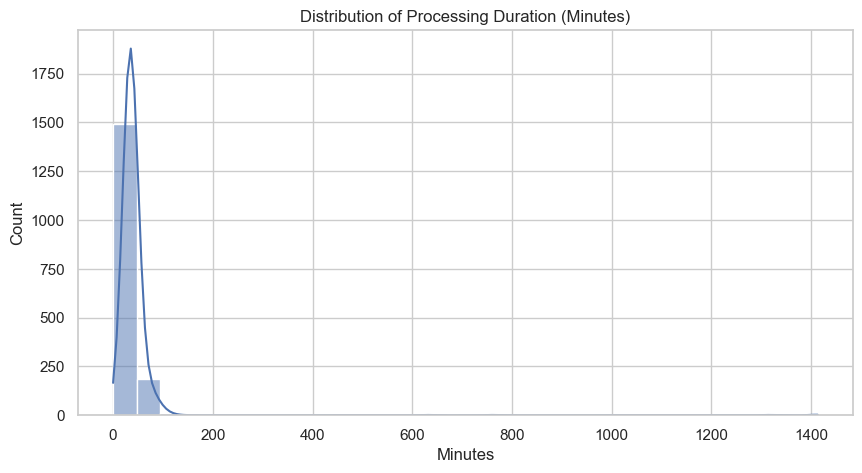

count    1699.000000
mean       40.967039
std        62.148385
min         0.000000
25%        31.000000
50%        35.000000
75%        41.000000
max      1413.000000
Name: processing_duration_min, dtype: float64


In [7]:
# Calculate duration in minutes
if 'bat_dau_dt' in df.columns and 'ket_thuc_dt' in df.columns:
    df['processing_duration_min'] = (df['ket_thuc_dt'] - df['bat_dau_dt']).dt.total_seconds() / 60

    plt.figure(figsize=(10, 5))
    sns.histplot(df['processing_duration_min'], bins=30, kde=True)
    plt.title('Distribution of Processing Duration (Minutes)')
    plt.xlabel('Minutes')
    plt.show()
    
    print(df['processing_duration_min'].describe())

### 3.2 Alloy Consumption

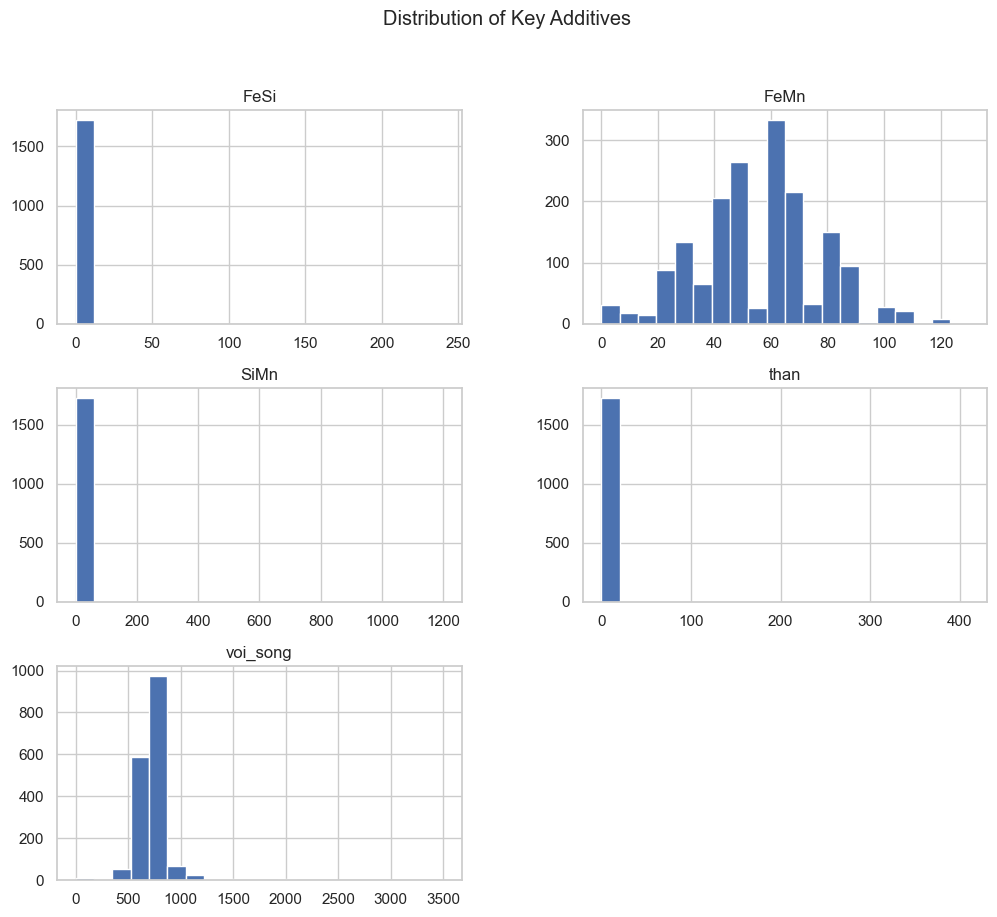

In [8]:
additives = ['FeSi', 'FeMn', 'SiMn', 'than', 'voi_song']
existing_additives = [col for col in additives if col in df.columns]

if existing_additives:
    df[existing_additives].hist(figsize=(12, 10), bins=20)
    plt.suptitle("Distribution of Key Additives")
    plt.show()

### 3.3 Production Count by Day

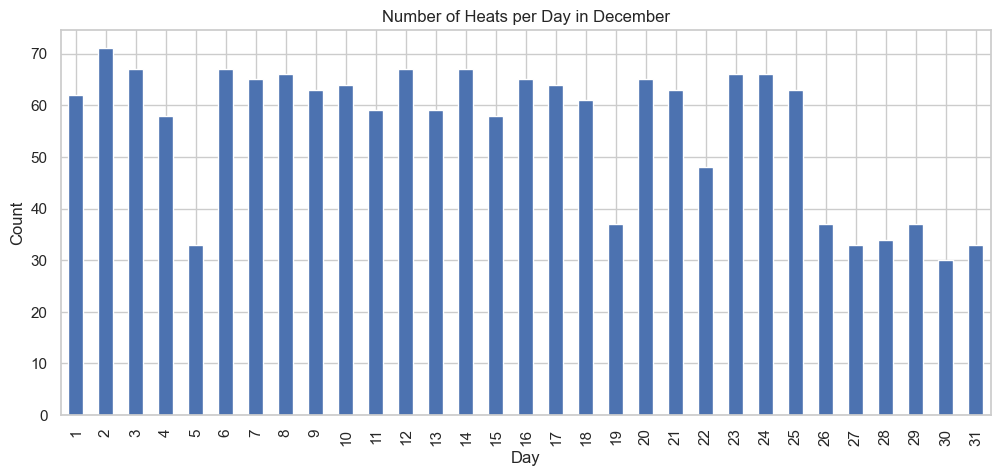

In [9]:
daily_counts = df.groupby(df['ngay_clean'].dt.day).size()

plt.figure(figsize=(12, 5))
daily_counts.plot(kind='bar')
plt.title('Number of Heats per Day in December')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

### 3.4 Temperature Drop Analysis
Difference between 'nhiet_do_vao_tl' (Input Temp) and 'nhiet_do_ra_thep' (Output Temp if available) or target.

Temperature columns: ['nhiet_do_vao_tl', 'nhiet_do_duc_yeu_cau', 'nhiet_do_do_tren_duc']


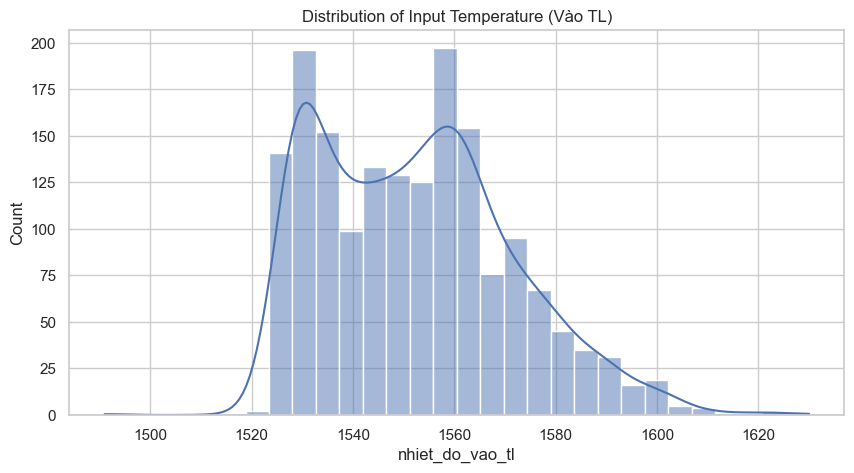

In [10]:
# Example: Check columns for temperature
temp_cols = [c for c in df.columns if 'nhiet' in c.lower()]
print("Temperature columns:", temp_cols)

if 'nhiet_do_vao_tl' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['nhiet_do_vao_tl'].dropna(), kde=True)
    plt.title('Distribution of Input Temperature (Vào TL)')
    plt.show()